## Compare classification with different quantization matrices

In [1]:
import numpy as np
import utils.makeDataset as DatasetMaker
from utils.training import show_confusion_matrix, unique_images, get_average_dct, save_model_and_label_encoder
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import os

In [2]:
OUTPUT_DATA_FOLDER = '../output/datasets/'
INPUT_DATA_FOLDER = '../data/'
DATASETS = ["Q10", "Q50", "Q90"]  # with random d1 d2 d3 and random roundings
BL_COMPUTE_AVG = False

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

MODELS = {
    "rf": RandomForestClassifier(max_depth=10, random_state=0),
    "adaboost": AdaBoostClassifier(),
    "svm": make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True)),
    "naive_bayes" : GaussianNB()
}

### Loading data and preprocessing

In [4]:
from sklearn import preprocessing

X = []
y_labels = []

for current_dataset in DATASETS:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

new_X, new_y = unique_images(X, y.tolist())

### Cross val predict for each model to test

              precision    recall  f1-score   support

         Q10       1.00      1.00      1.00       100
         Q50       0.98      1.00      0.99       100
         Q90       1.00      0.98      0.99       100

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



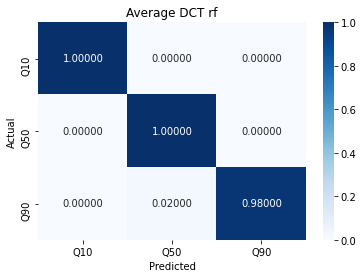

              precision    recall  f1-score   support

         Q10       1.00      1.00      1.00       100
         Q50       1.00      1.00      1.00       100
         Q90       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



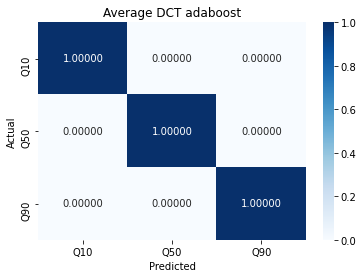

              precision    recall  f1-score   support

         Q10       0.64      0.98      0.77       100
         Q50       0.83      0.45      0.58       100
         Q90       1.00      0.92      0.96       100

    accuracy                           0.78       300
   macro avg       0.82      0.78      0.77       300
weighted avg       0.82      0.78      0.77       300



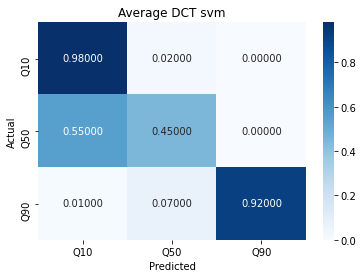

              precision    recall  f1-score   support

         Q10       0.92      0.95      0.94       100
         Q50       0.88      0.84      0.86       100
         Q90       0.92      0.94      0.93       100

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



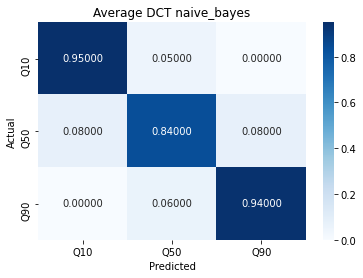

In [5]:
from sklearn.model_selection import cross_val_predict

for model in MODELS.keys():
    y_pred = cross_val_predict(MODELS[model], new_X, new_y, cv=4)
    print(classification_report(new_y, y_pred, target_names=DATASETS))
    show_confusion_matrix(new_y, y_pred, DATASETS, f"Average DCT {model}")

### Train and save best model

In [17]:
DATASETS = ["Q10", "Q50", "Q90"]  # with random d1 d2 d3 and random roundings
MODEL_TYPE = "adaboost"
MODEL_CATEGORY = "Q"
PATH_MODELS = f"../models/final_models/{MODEL_CATEGORY}/"
MODEL_NAME = ''.join([str(MODEL_TYPE)] + ['_' + str(curr) for curr in DATASETS])
model = MODELS[MODEL_TYPE]

X = []
y_labels = []

for current_dataset in DATASETS:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

In [18]:
model.fit(X, y)
save_model_and_label_encoder(model, le, PATH_MODELS, MODEL_NAME)

In [19]:
DATASETS = ["Q10", "Q50", "Q90"]  # with random d1 d2 d3 and random roundings
MODEL_CATEGORY = "Q"
MODEL_TYPE = "rf"
PATH_MODELS = f"../models/final_models/{MODEL_CATEGORY}/"
MODEL_NAME = ''.join([str(MODEL_TYPE)] + ['_' + str(curr) for curr in DATASETS])
model = MODELS[MODEL_TYPE]

X = []
y_labels = []

for current_dataset in DATASETS:
    _, X_current = DatasetMaker.load_dataset(current_dataset)
    y_labels += [current_dataset] * len(X_current)
    if BL_COMPUTE_AVG:
        X += get_average_dct(X_current)
    else:
        X += X_current

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels)

In [20]:
model.fit(X, y)
save_model_and_label_encoder(model, le, PATH_MODELS, MODEL_NAME)